# Project "Making business decisions based on A/B test".

# Project description
We work as an analyst for a large online store. Together with the marketing department, we have prepared a list of hypotheses to increase revenue.
In this project, we will prioritize hypotheses, run an A/B test and analyze the results.

# Data description
File /datasets/hypothesis.csv.
- Hypothesis — brief description of the hypothesis;
- Reach — user coverage on a 10-point scale;
- Impact — impact on users on a 10-point scale;
- Confidence — confidence in the hypothesis on a 10-point scale;
- Efforts — the cost of resources to test the hypothesis on a 10-point scale. The greater the value of Efforts, the more expensive hypothesis testing is.


File /datasets/orders.csv. 
- transactionId — order ID;
- visitorId — ID of the user who made the order;
- date — date when the order was made;
- revenue — order revenue;
- group — the A/B test group that the order fell into.


File /datasets/visitors.csv.
- date — date;
- group — A/B test group;
- visitors — the number of users on the specified date in the specified A/B test group.

# Work plan:
1. Open the data files and study the general information. Next, we will check the data for omissions and duplicates.
2. Prioritize hypotheses:
Let's apply the ICE framework.
Let's apply the RICE framework.
3. Analyze the A/B test:
Let's plot the cumulative revenue by groups.
Let's plot the cumulative average check by groups.
Let's plot the relative change of the cumulative average check of group B to group A.
Let's plot the cumulative average number of orders per visitor by groups.
Let's plot the relative change in the cumulative average number of orders per visitor of group B to group A.
Let's build a dot graph of the number of orders by users.
Let's calculate the 95th and 99th percentiles of the number of orders per user.
Let's build a dot graph of the cost of orders.
Let's calculate the 95th and 99th percentiles of the cost of orders.
Let's calculate the statistical significance of differences in the average number of orders per visitor between groups based on "raw" data.
Let's calculate the statistical significance of differences in the average order receipt between groups based on "raw" data.
Let's calculate the statistical significance of differences in the average number of orders per visitor between groups based on "cleaned" data.
Let's calculate the statistical significance of the differences in the average order receipt between the groups according to the "cleared" data.
Let's make a decision based on the test results.

## Let's open the files and study the general information

In [1]:
# Importing the libraries that we will need in this project
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 400

In [2]:
# Let's read the data from the csv file into a dataframe and save it to a variable
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')


In [3]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# We will reduce the column names to lowercase
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
# Let's read the data from the csv file into a dataframe and save it to a variable
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')


In [7]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


### Let's pre-process the data for the orders file

In [9]:
# Rename the columns in the table
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [10]:
# Let's bring the date column to the datetime type
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# Let's check how many gaps there are in our table
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

**Conclusion: no gaps were detected.**

In [12]:
# Let's check how many explicit duplicates there are in our table
orders.duplicated().sum()

0

**Conclusion: no obvious duplicates were found.**

In [13]:
# Let's check that all orders are divided into only two groups: A and B
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

**Conclusion: only groups A and B are found in the table, there is no error.**

In [14]:
# Let's check for which days we have data in the table
orders.groupby('date')['visitor_id'].nunique()

date
2019-08-01    40
2019-08-02    42
2019-08-03    40
2019-08-04    29
2019-08-05    47
2019-08-06    40
2019-08-07    42
2019-08-08    42
2019-08-09    37
2019-08-10    38
2019-08-11    26
2019-08-12    45
2019-08-13    35
2019-08-14    44
2019-08-15    45
2019-08-16    38
2019-08-17    23
2019-08-18    25
2019-08-19    42
2019-08-20    32
2019-08-21    35
2019-08-22    40
2019-08-23    39
2019-08-24    30
2019-08-25    24
2019-08-26    40
2019-08-27    43
2019-08-28    44
2019-08-29    39
2019-08-30    32
2019-08-31    30
Name: visitor_id, dtype: int64

**Conclusion: the table shows data for August 2019, not a single month was missed.**

In [15]:
# Let's read the data from the csv file into a dataframe and save it to a variable
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [16]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Let's perform data preprocessing for the file with visits

In [18]:
# Let's bring the date column to the datetime type
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [19]:
# Let's check how many gaps there are in our table
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

**Conclusion: no gaps were detected.**

In [20]:
# Let's check how many explicit duplicates there are in our table
visitors.duplicated().sum()

0

**Conclusion: no obvious duplicates were found.**

In [21]:
# Let's check that all orders are divided into only two groups: A and B
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

**Conclusion: only groups A and B are found in the table, there is no error.**

In [22]:
# Let's check for which days we have data in the table
visitors.groupby('date')['group'].count()

date
2019-08-01    2
2019-08-02    2
2019-08-03    2
2019-08-04    2
2019-08-05    2
2019-08-06    2
2019-08-07    2
2019-08-08    2
2019-08-09    2
2019-08-10    2
2019-08-11    2
2019-08-12    2
2019-08-13    2
2019-08-14    2
2019-08-15    2
2019-08-16    2
2019-08-17    2
2019-08-18    2
2019-08-19    2
2019-08-20    2
2019-08-21    2
2019-08-22    2
2019-08-23    2
2019-08-24    2
2019-08-25    2
2019-08-26    2
2019-08-27    2
2019-08-28    2
2019-08-29    2
2019-08-30    2
2019-08-31    2
Name: group, dtype: int64

**Conclusion: the table shows data for August 2019, not a single month was missed.**

### Let's check the correctness of splitting users into groups

In [23]:
# Divide the orders table into tables by groups A and B
users_A = orders.query('group == "A"')
users_B = orders.query('group == "B"')

In [24]:
# We get the user IDs that occur in both tables
a_in_b = users_A.loc[users_A['visitor_id'].isin(users_B['visitor_id'])]['visitor_id']
b_in_a = users_B.loc[users_B['visitor_id'].isin(users_A['visitor_id'])]['visitor_id']

In [25]:
# Combine users and remove duplicate values
repeating_users = pd.concat([b_in_a, a_in_b], axis=0).drop_duplicates()

In [26]:
# Let's count the number of users in both groups
repeating_users.shape[0]

58

In [27]:
# We will remove such users from the orders table
orders = orders.loc[~orders['visitor_id'].isin(repeating_users)]

#### Conclusion: at this stage, we have studied the general information about the source data, checked for gaps in the tables, checked the data for duplicates. No duplicates, omissions, or other errors were found in the source data.
#### 58 users were also found to fall into both groups. It was decided to remove such users from consideration.

## Part 1. Prioritization of hypotheses.

**Since it will not be possible to test all hypotheses due to lack of time and resources, it is necessary to choose those hypotheses that maximize the expected improvement of key business metrics.**
**ICE and RICE frameworks are one of the most popular ways to prioritize hypotheses.**
**They consist of the following components:
Reach — how many users will be affected by the change you want to make;
Impact — how much the change will affect users, their experience and satisfaction with the product;
Confidence — how confident are you that this change will affect users in this way;
Efforts — how much it costs to test this hypothesis.**
**The parameters of the ICE and RICE frameworks are evaluated in convenient scales: for example, from 0 to 10 or in Fibonacci numbers.**

##### Let's use the ICE framework to prioritize hypotheses and sort them in descending order of priority.

In [28]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
ice = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [29]:
ice['hypothesis'].values[0]

'Запустить акцию, дающую скидку на товар в день рождения'

##### Let's use the RICE framework to prioritize hypotheses and sort them in descending order of priority.

In [30]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [31]:
rice['hypothesis'].values[0]

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

#### Conclusion: when using different hypothesis prioritization frameworks, we got different results. This is due to the fact that the RICE framework additionally takes into account the reach parameter, so hypothesis No. 7 received the highest score for which the reach parameter is 10.

## Part 2. Analysis of the A/B test.

##### First, we will prepare a file with cumulative data broken down by testing groups.
##### We will add there: the number of orders on the specified date, the number of users who made at least one order on the specified date, revenue on the specified date, the number of visitors to the online store on the specified date.

In [32]:
# Creating an array of unique pairs of date values and test groups
datesGroups = orders[['date','group']].drop_duplicates()

In [33]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [34]:
# We get aggregated cumulative data on orders by days
orders_aggregated = datesGroups.apply\
(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
 .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [35]:
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [36]:
# We get aggregated cumulative data on the visitors of the online store by days
visitors_aggregated = datesGroups.apply\
(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
 .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [37]:
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [38]:
# We combine cumulative data in one table and assign understandable names to its columns
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [39]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


##### Let's plot cumulative revenue graphs by days and groups of A/B testing.

In [40]:
# Let's create a dataframe with a cumulative number of orders and cumulative revenue by days in group A
cumulative_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders', 'visitors']]

In [41]:
# Let's create a dataframe with a cumulative number of orders and cumulative revenue by days in group B
cumulative_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders', 'visitors']]

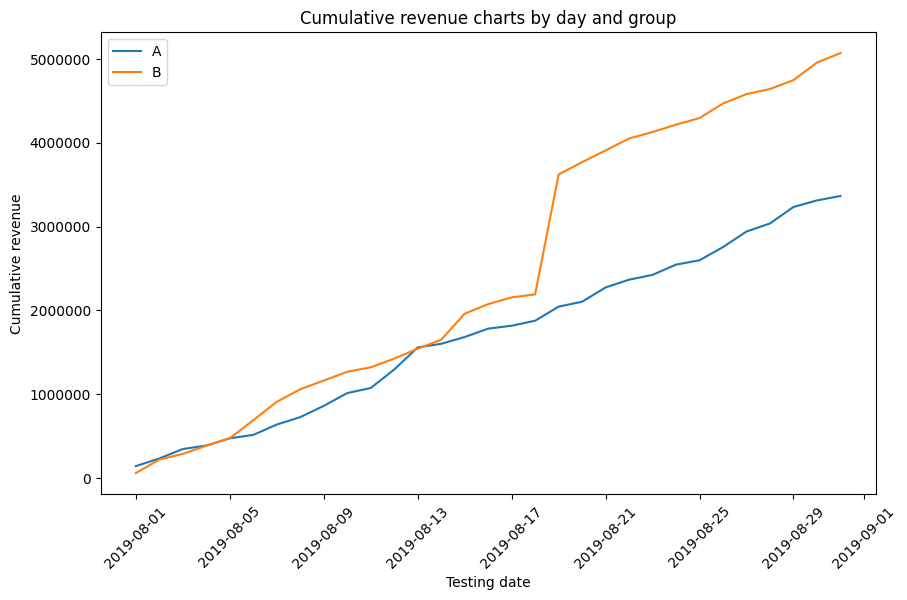

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_A['date'], cumulative_A['revenue'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['revenue'], label='B')
plt.legend()
plt.xlabel('Testing date')
plt.ylabel('Cumulative revenue')
plt.title('Cumulative revenue charts by day and group')
plt.xticks(rotation='45')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.show()

**Conclusion: Revenue increases throughout the test. At the same time, the schedule of group B has a sharp jump in the area of the date 18.08.2019.
Perhaps this indicates the presence of abnormally large orders in this group.**

##### Let's plot the cumulative average check by days and groups of A/B testing.

In [43]:
# We will add a column with an average cumulative check to each table
cumulative_A['avg_check'] = cumulative_A['revenue'] / cumulative_A['orders']
cumulative_B['avg_check'] = cumulative_B['revenue'] / cumulative_B['orders']

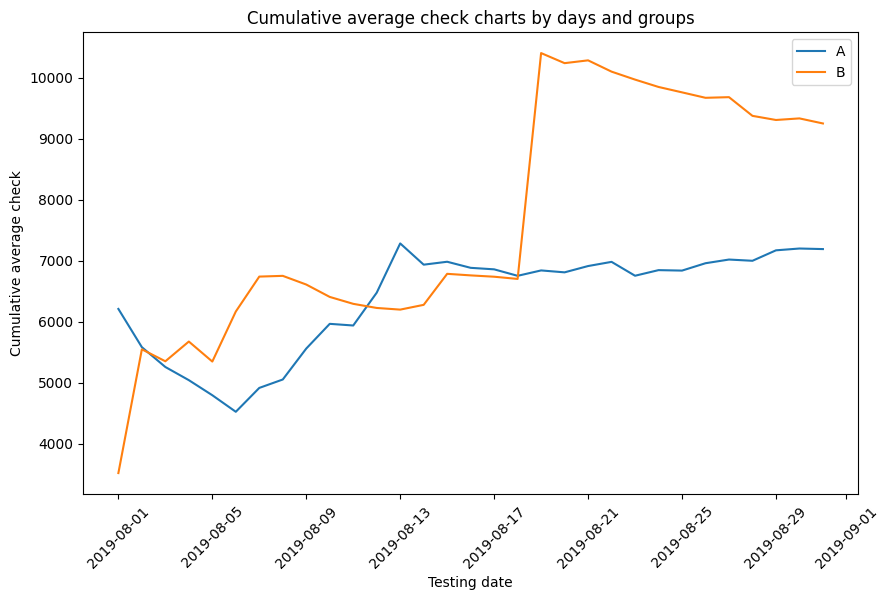

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_A['date'], cumulative_A['avg_check'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['avg_check'], label='B')
plt.legend() 
plt.xlabel('Testing date')
plt.ylabel('Cumulative average check')
plt.title('Cumulative average check charts by days and groups')
plt.xticks(rotation='45')
plt.show()

**Conclusion: At the end of the test, the average check of group A has stabilized, the average check of group B continues to decrease slightly.
The assumption of abnormally large orders in group B is confirmed - we again see a sharp jump around the date of 18.08.2019.**

##### Let's plot the relative change of the cumulative average check of group B to group A.

In [45]:
# We collect data in one dataframe
cumulative_full = cumulative_A.merge(cumulative_B, on='date', how='left', suffixes=['A', 'B'])

In [46]:
cumulative_full.head()

,date,revenueA,ordersA,visitorsA,avg_checkA,revenueB,ordersB,visitorsB,avg_checkB
0,2019-08-01,142779,23,719,6207.782609,59758,17,713,3515.176471
1,2019-08-02,234381,42,1338,5580.500000,221801,40,1294,5545.025000
2,2019-08-03,346854,66,1845,5255.363636,288850,54,1803,5349.074074
3,2019-08-04,388030,77,2562,5039.350649,385740,68,2573,5672.647059
4,2019-08-05,474413,99,3318,4792.050505,475648,89,3280,5344.359551


In [47]:
# Let's add a column with the relative difference of the average checks
cumulative_full['check_difference'] = (cumulative_full['avg_checkB'] / cumulative_full['avg_checkA']) - 1 

No handles with labels found to put in legend.


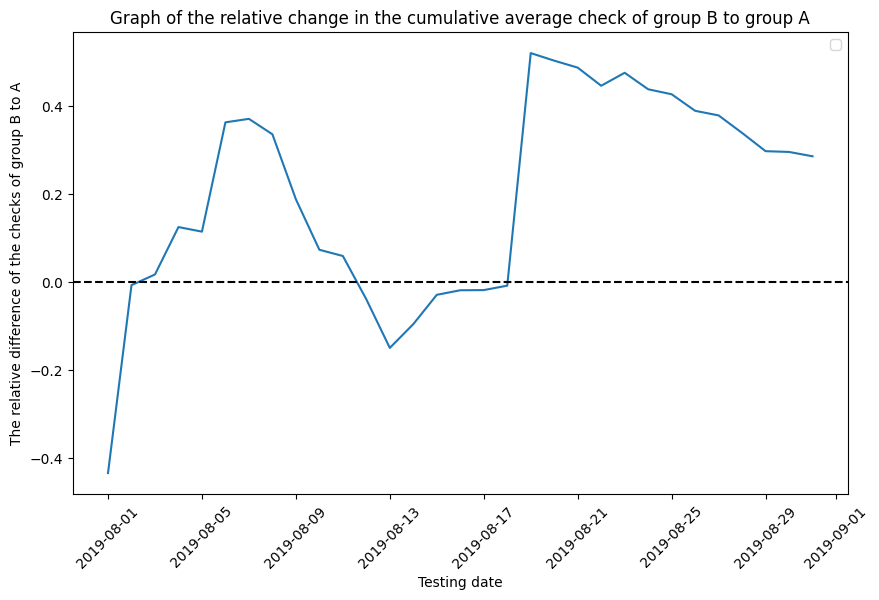

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_full['date'], cumulative_full['check_difference'])
plt.legend() 
plt.xlabel('Testing date')
plt.ylabel('The relative difference of the checks of group B to A')
plt.title('Graph of the relative change in the cumulative average check of group B to group A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='45')
plt.show()

**Conclusion: At the beginning of testing, group B showed the best results, but there was a sharp decline around 10.08.2019, possibly due to the fact that group A also has abnormally large orders. 
Further, in the area of 18.08.2019, there is a sharp jump up due to abnormally large orders in group B.
We also observe a rather sharp decline in the schedule in the period from 25.08.2019 to 29.08.2019, possibly due to abnormally large orders in Group A.**

##### Let's plot the cumulative average number of orders per visitor by groups.

In [49]:
# Let's calculate the conversion in both tables
cumulative_A['conversion'] = cumulative_A['orders'] / cumulative_A['visitors']
cumulative_B['conversion'] = cumulative_B['orders'] / cumulative_B['visitors']

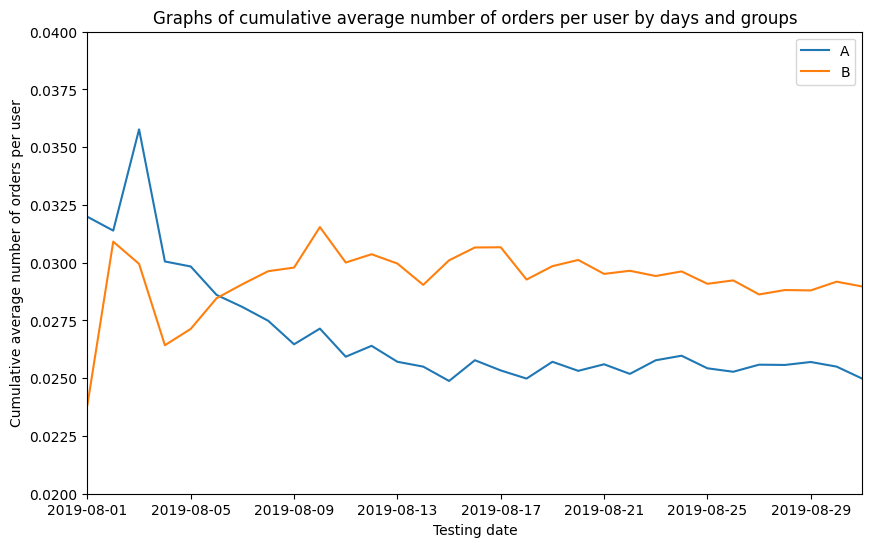

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_A['date'], cumulative_A['conversion'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['conversion'], label='B')
plt.legend() 
plt.xlabel('Testing date')
plt.ylabel('Cumulative average number of orders per user')
plt.title('Graphs of cumulative average number of orders per user by days and groups')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.02, 0.04])
plt.show()

**Conclusion: throughout almost the entire test, group B shows much better results than group A, by the end of the test, the indicators of the number of orders per visitor have stabilized.** 

##### Let's plot the relative change in the cumulative average number of orders per visitor of group B to group A

In [51]:
cumulative_full_2 = cumulative_A.merge(cumulative_B, on='date', how='left', suffixes=['A', 'B'])

In [52]:
cumulative_full_2.head()

,date,revenueA,ordersA,visitorsA,avg_checkA,conversionA,revenueB,ordersB,visitorsB,avg_checkB,conversionB
0,2019-08-01,142779,23,719,6207.782609,0.031989,59758,17,713,3515.176471,0.023843
1,2019-08-02,234381,42,1338,5580.500000,0.031390,221801,40,1294,5545.025000,0.030912
2,2019-08-03,346854,66,1845,5255.363636,0.035772,288850,54,1803,5349.074074,0.029950
3,2019-08-04,388030,77,2562,5039.350649,0.030055,385740,68,2573,5672.647059,0.026428
4,2019-08-05,474413,99,3318,4792.050505,0.029837,475648,89,3280,5344.359551,0.027134


In [53]:
cumulative_full_2['conversion_difference'] = (cumulative_full_2['conversionB'] / cumulative_full_2['conversionA']) - 1

No handles with labels found to put in legend.


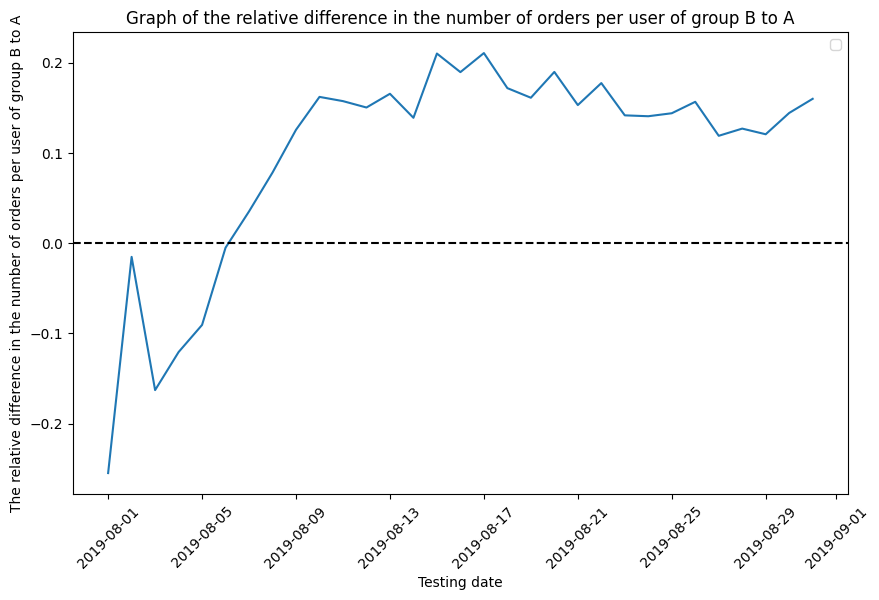

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_full_2['date'], cumulative_full_2['conversion_difference'])
plt.legend() 
plt.xlabel('Testing date')
plt.ylabel('The relative difference in the number of orders per user of group B to A')
plt.title('Graph of the relative difference in the number of orders per user of group B to A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='45')
plt.show()

**Conclusion: Group B shows significantly better results, but perhaps this is due to abnormal values.**

##### Let's build a dot graph of the number of orders by users

In [55]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [56]:
# Let's create a pivot table to calculate the number of orders per user
order_per_user = orders.pivot_table(index='visitor_id', values='transaction_id', aggfunc=['nunique']).reset_index()

In [57]:
order_per_user.columns = ['user_id', 'orders']

In [58]:
order_per_user.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


No handles with labels found to put in legend.


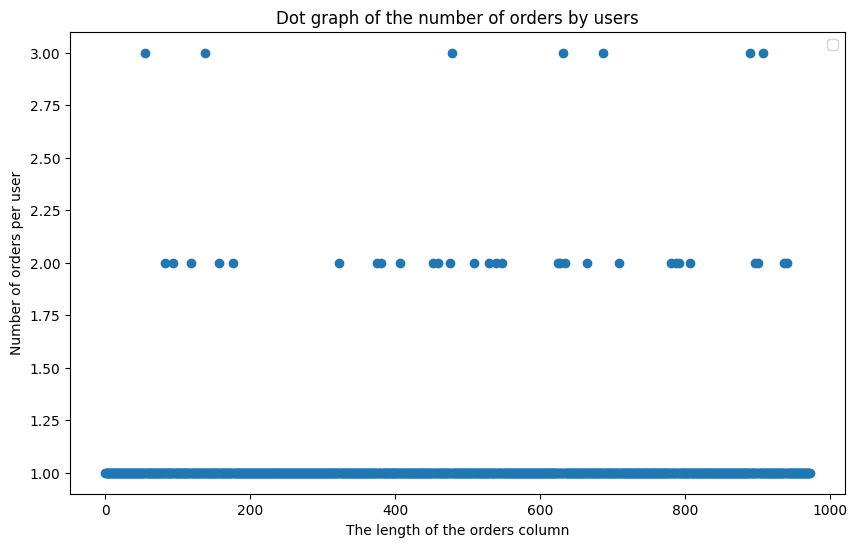

In [98]:
# Let's build a dot graph
plt.figure(figsize=(10, 6))
x_values = pd.Series(range(0,len(order_per_user['orders'])))
plt.scatter(x_values, order_per_user['orders'])
plt.legend() 
plt.xlabel('The length of the orders column')
plt.ylabel('Number of orders per user')
plt.title('Dot graph of the number of orders by users')
plt.show()

**Conclusion: the overwhelming number of users makes 1 order.**

##### Let's calculate the 95th and 99th percentiles of the number of orders per user.

In [60]:
np.percentile(order_per_user['orders'], [90, 95, 99])

array([1., 1., 2.])

**Conclusion: users who make 2 orders or more will be considered abnormal.**

##### Let's build a dot graph of the cost of orders

No handles with labels found to put in legend.


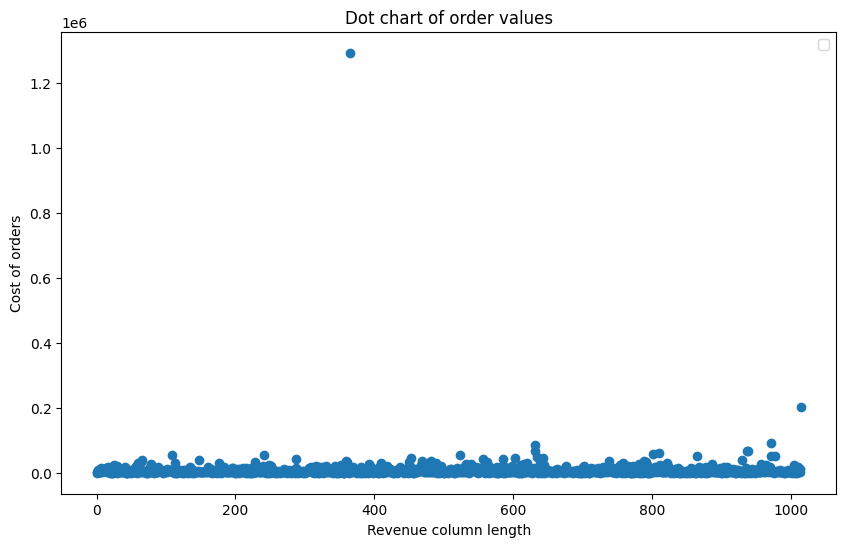

In [99]:
plt.figure(figsize=(10, 6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.legend() 
plt.xlabel('Revenue column length')
plt.ylabel('Cost of orders')
plt.title('Dot chart of order values')
plt.show()

**According to such a schedule, it is difficult to draw any conclusions, so we will build the schedule again, taking into account the scale.**

No handles with labels found to put in legend.


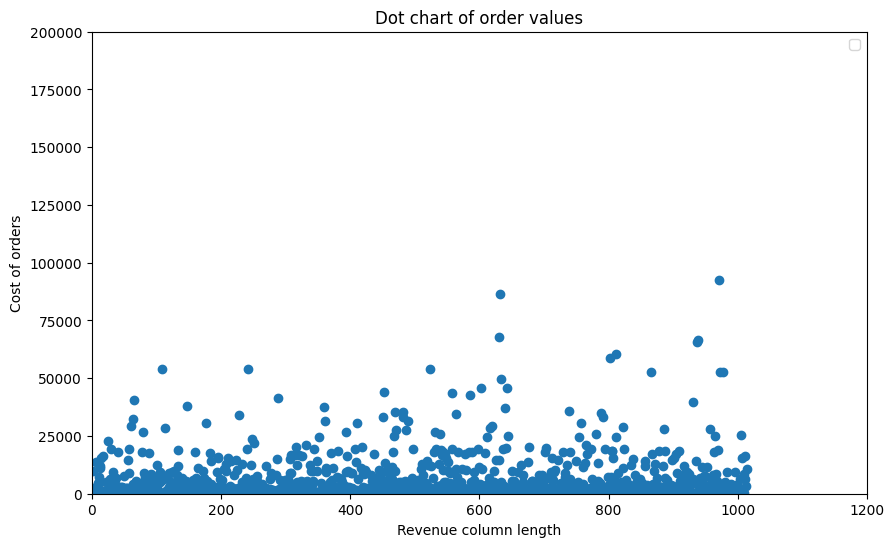

In [100]:
plt.figure(figsize=(10, 6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.legend() 
plt.xlabel('Revenue column length')
plt.ylabel('Cost of orders')
plt.title('Dot chart of order values')
plt.axis([0, 1200, 0, 200000])
plt.show()

**Conclusion: the overwhelming number of orders ranges from 0 to 26,000 rubles inclusive.**

##### Let's calculate the 95th and 99th percentiles of the cost of orders

In [63]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

**Conclusion: users who make orders for more than 30,000 rubles will be considered abnormal.**

##### Let's calculate the statistical significance of differences in the average number of orders per visitor between groups based on "raw" data.
Let's formulate hypotheses. 
H0 - there are no differences in the average number of orders between groups A and B.
H1 - there are differences in the average number of orders between groups A and B.

In [64]:
# Let's start with data preparation
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']



In [65]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [66]:
# Create variables ordersByUsersA and ordersByUsersB with columns ['userId', 'orders']. 
# In them, for users who have ordered at least 1 time, we will indicate the number of completed orders.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

In [67]:
display(ordersByUsersA.head())
ordersByUsersB.head()

,user_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,user_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [68]:
# Declare the variables SampleA and SampleB, in which the number of orders will correspond to users from different groups. 
# Those who have not ordered anything will be matched with zeros
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
                                                                - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
                                                                 - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [101]:
# Apply the Mann-Whitney criterion and format the p-value by rounding it to three decimal places.
# The significance level will be considered equal to 0.05
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-значение:', round(results, 3))
if results < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis')

p-значение: 0.011
We reject the null hypothesis


In [70]:
# Let's calculate the relative increase in the average number of orders of group B relative to group A
round(sampleB.mean() / sampleA.mean() - 1, 2)

0.16

**Conclusion: the Mann-Whitney test on raw data showed that there are differences in the average number of orders between groups. This is also confirmed by the calculation of the relative increase in the average number of orders in group B: the number of orders in group B is 16% more than in group A.**

##### Let's calculate the statistical significance of differences in the average order receipt between groups based on "raw" data.
Let's formulate hypotheses. 
H0 - there are no differences in the average check between groups A and B. 
H1 - there are differences in the average check between groups A and B.

In [71]:
# Let's create samples with the values of the average check for groups A and B
revenue_A = orders[orders['group']=='A']['revenue']
revenue_B = orders[orders['group']=='B']['revenue']

In [102]:
# Apply the Mann-Whitney criterion and format the p-value by rounding it to three decimal places.
# The significance level will be considered equal to 0.05
alpha = 0.05
results = stats.mannwhitneyu(revenue_A, revenue_B)[1]
print('p-value:', round(results, 3))
if results < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis')

p-value: 0.829
It was not possible to reject the null hypothesis


In [73]:
# Let's calculate the relative increase in the average check of group B relative to group A
round(revenue_B.mean() / revenue_A.mean() - 1, 2)

0.29

**Conclusion: The average check of group B is 29% higher than the average check of group A, however, the Mann-Whitney test on raw data showed that there are no differences in the average check between groups.
Accordingly, it can be concluded that the difference of 29% is not statistically significant and there are no differences in the average check between groups A and B.**

##### Let's calculate the statistical significance of differences in the average number of orders per visitor between groups based on "cleaned" data.
Let's formulate hypotheses. 
H0 - there are no differences in the average number of orders between groups A and B.
H1 - there are differences in the average number of orders between groups A and B.

In [74]:
order_per_user.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [75]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [76]:
# We will get a table of users with abnormal values of the number of orders and the amount of orders
users_with_many_orders = order_per_user.query('orders > 2')['user_id']
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates()

display(abnormal_users.head())
abnormal_users.shape[0]

55      249864742
138     611059232
478    2108163459
632    2742574263
687    2988190573
dtype: int64

49

In [77]:
# In groups A and B, we will leave only those orders that relate to "normal" users
orders_A_filtered = ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormal_users))]['orders']
orders_B_filtered = ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormal_users))]['orders']

In [78]:
# Declare the variables sample_filtered and sampleB_filtered, in which the number of orders will correspond to users from different groups. 
# Those who have not ordered anything will be matched with zeros
sampleA_filtered = pd.concat([orders_A_filtered, pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
                                                                    - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB_filtered = pd.concat([orders_B_filtered, pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
                                                                    - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [103]:
# Apply the Mann-Whitney criterion and format the p-value by rounding it to three decimal places.
# The significance level will be considered equal to 0.05
alpha = 0.05
results = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]
print('p-value:', round(results, 3))
if results < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis')

p-value: 0.01
We reject the null hypothesis


In [80]:
# Let's calculate the relative increase in the average number of orders of group B relative to group A
round(sampleB_filtered.mean() / sampleA_filtered.mean() - 1, 2)

0.19

**Conclusion: the Mann-Whitney test on the cleared data showed that there are differences in the average number of orders between groups. This is also confirmed by the calculation of the relative increase in the average number of orders in group B: the number of orders in group B is 19% more than in group A.**

##### Let's calculate the statistical significance of the differences in the average order receipt between the groups according to the "cleared" data.
Let's formulate hypotheses. 
H0 - there are no differences in the average check between groups A and B. 
H1 - there are differences in the average check between groups A and B.  

In [81]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [82]:
# Let's create samples with the values of the average check for groups A and B
revenue_A_filtered = orders[np.logical_and(orders['group']=='A', 
                                           np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']
revenue_B_filtered = orders[np.logical_and(orders['group']=='B', 
                                           np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

In [104]:
# Apply the Mann-Whitney criterion and format the p-value by rounding it to three decimal places.
# The significance level will be considered equal to 0.05
alpha = 0.05
results = stats.mannwhitneyu(revenue_A_filtered, revenue_B_filtered)[1]
print('p-value:', round(results, 3))
if results < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis')

p-value: 0.741
It was not possible to reject the null hypothesis


In [84]:
# Let's calculate the relative increase in the average check of group B relative to group A
round(revenue_B_filtered.mean() / revenue_A_filtered.mean() - 1, 2)

-0.03

**Conclusion: the average check of group B is 3% lower than the average check of group A, the Mann-Whitney test on the cleared data showed that there are no differences in the average check between the groups.
Accordingly, we can conclude that this difference is not significant.**

**Let's see how the graphs of the relative change in the number of orders and the average receipt will behave if we remove abnormal users.**

In [85]:
# We leave orders only for normal users
orders_wihout_abnormal = orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]

In [86]:
# We get aggregated cumulative data on orders by days
orders_wihout_abnormal_aggr = datesGroups.apply\
(lambda x: orders_wihout_abnormal[np.logical_and(orders_wihout_abnormal['date'] <= x['date'], 
                                                 orders_wihout_abnormal['group'] == x['group'])]\
 .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [87]:
# We combine cumulative data in one table and assign understandable names to its columns
cumulative_data_filtered = orders_wihout_abnormal_aggr.merge(visitors_aggregated, left_on=['date', 'group'], 
                                                             right_on=['date', 'group'])
cumulative_data_filtered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [88]:
# Let's create a dataframe with a cumulative number of orders and cumulative revenue by days in group A
cumulative_A_filtered = cumulative_data_filtered[cumulative_data['group']=='A'][['date','revenue', 'orders', 'visitors']]
cumulative_B_filtered = cumulative_data_filtered[cumulative_data['group']=='B'][['date','revenue', 'orders', 'visitors']]

In [89]:
# We will add a column with an average cumulative receipt and conversion to each table
cumulative_A_filtered['conversion'] = cumulative_A_filtered['orders'] / cumulative_A_filtered['visitors']
cumulative_B_filtered['conversion'] = cumulative_B_filtered['orders'] / cumulative_B_filtered['visitors']
cumulative_A_filtered['avg_check'] = cumulative_A_filtered['revenue'] / cumulative_A_filtered['orders']
cumulative_B_filtered['avg_check'] = cumulative_B_filtered['revenue'] / cumulative_B_filtered['orders']

In [90]:
# Combining the data into one table
cumulative_full_filtered = cumulative_A_filtered.merge(cumulative_B_filtered, on='date', how='left', suffixes=['A', 'B'])
cumulative_full_filtered.head()

,date,revenueA,ordersA,visitorsA,conversionA,avg_checkA,revenueB,ordersB,visitorsB,conversionB,avg_checkB
0,2019-08-01,112340,18,719,0.025035,6241.111111,59758,17,713,0.023843,3515.176471
1,2019-08-02,202252,36,1338,0.026906,5618.111111,152992,38,1294,0.029366,4026.105263
2,2019-08-03,314725,60,1845,0.032520,5245.416667,220041,52,1803,0.028841,4231.557692
3,2019-08-04,355901,71,2562,0.027713,5012.690141,285581,65,2573,0.025262,4393.553846
4,2019-08-05,442284,93,3318,0.028029,4755.741935,375489,86,3280,0.026220,4366.151163


In [91]:
# We consider the difference in the number of orders and the average receipt
cumulative_full_filtered['check_difference'] = \
(cumulative_full_filtered['avg_checkB'] / cumulative_full_filtered['avg_checkA']) - 1

cumulative_full_filtered['conversion_difference'] = \
(cumulative_full_filtered['conversionB'] / cumulative_full_filtered['conversionA']) - 1


No handles with labels found to put in legend.


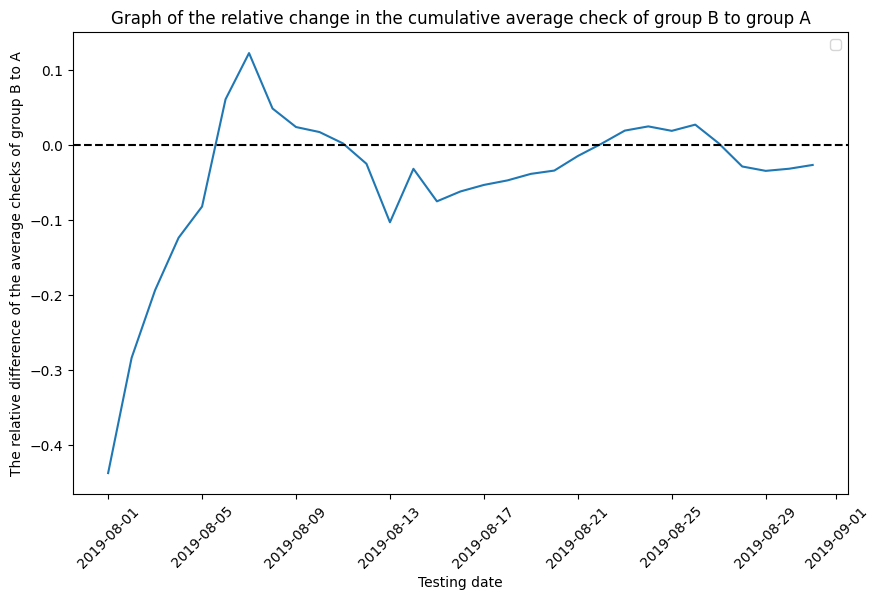

In [105]:
# Building graphs
plt.figure(figsize=(10, 6))
plt.plot(cumulative_full_filtered['date'], cumulative_full_filtered['check_difference'])
plt.legend() 
plt.xlabel('Testing date')
plt.ylabel('The relative difference of the average checks of group B to A')
plt.title('Graph of the relative change in the cumulative average check of group B to group A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='45')
plt.show()

No handles with labels found to put in legend.


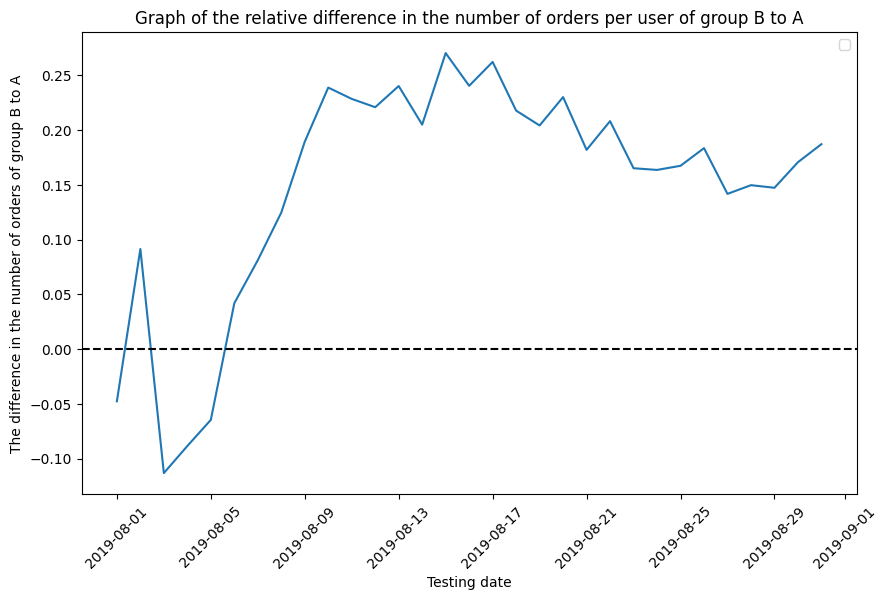

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_full_filtered['date'], cumulative_full_filtered['conversion_difference'])
plt.legend() 
plt.xlabel('Testing date')
plt.ylabel('The difference in the number of orders of group B to A')
plt.title('Graph of the relative difference in the number of orders per user of group B to A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='45')
plt.show()

**The graphs confirm the test results - Group B is better in terms of the number of orders, but slightly inferior in terms of the average check.**

##### Let's summarize the results of the test:
1. There is a statistically significant difference in conversion between groups A and B, and Group B has a higher conversion rate (both for raw and purified data).
2. There is no statistically significant difference between groups A and B in the average check of the groups (both for raw and purified data).
Accordingly, it is necessary to make a decision to stop the experiment and record the victory of group B.

# General conclusion on the project.
In this project, we prioritized hypotheses, ran an A/B test and analyzed the results.
The project is divided into several parts: in the first part, we studied the general information about the submitted data and checked them for omissions and duplicates. No duplicates or omissions were found. 58 users were also found to fall into both groups. It was decided to remove these users from consideration.

In the second part, we prioritized hypotheses using the RICE and ICE frameworks. We got different results. 
When using the ICE framework, hypothesis No. 8 "Launch a promotion giving a discount on a product on your birthday" won.
When using the RICE framework, hypothesis No. 7 was defeated: "Add a subscription form to all the main pages in order to collect a customer base for email newsletters." 
The difference in the results is due to the fact that the RICE framework additionally takes into account the reach parameter, so hypothesis No. 7 received the highest score for which the reach parameter is 10.

In the third part, we analyzed the A/B test. We were able to establish the following:
1. When analyzing the graphs of cumulative revenue and cumulative average receipt, it was found that there are abnormally large orders in group B.
2. According to the "raw" data, Group B showed significantly better results. Both by the average number of orders per user and by the average receipt.
3. A decision was made to cut off abnormal users: with the number of orders greater than 1 and the order size greater than 30,000 rubles.
4. The Mann-Whitney statistical test on "raw" data showed the following:
- 4.1 There is a statistically significant difference between groups A and B in the number of orders per user, the difference was 16% in favor of group B.
- 4.2 There is no statistically significant difference in the average check between groups A and B.
5. The Mann-Whitney statistical test on "cleaned" data showed the following:
- 5.1 There is a statistically significant difference between groups A and B in the number of orders per user, the difference was 19% in favor of group B.
- 5.2 There is no statistically significant difference in the average check between groups A and B.

Based on the test results, it was decided to stop the experiment and record the victory of group B.
